# PyTorch Gradients

This section covers the PyTorch autograd implementation of gradient descent. Tools include:

* torch.autograd.backward()
* torch.autograd.grad()


## Autograd - Automatic Differentiation

In previous sections we created tensors and performed a variety of operations on them, but we did nothing to store the sequence of operations, or to apply the derivative of a completed function.

In this section we'll introduce the concept of the dynamic computational graph which is comprised of all the Tensor objects in the network, as well as the Functions used to create them. Note that only the input Tensors we create ourselves will not have associated Function objects.

The PyTorch autograd package provides automatic differentiation for all operations on Tensors. This is because operations become attributes of the tensors themselves. When a Tensor's .requires_grad attribute is set to True, it starts to track all operations on it. When an operation finishes you can call .backward() and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its .grad attribute.

Let's see this in practice.

### Back-propagation on one step

In [1]:
import torch

Create a tensor with requires_grad set to True

This sets up computational tracking on the tensor.

In [2]:
x = torch.tensor(2.0, requires_grad=True)

 Define a function


In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


Since y was created as a result of an operation, it has an associated gradient function accessible as y. grad_En
The calculation of y is done as:
y =2(2)^4+ (2)^3 + 3(2)^2 + 5(2)+1=32+8+12+10+1=63
This is the value of y when x = 2.

Backprop


In [4]:
y.backward()

Display the resulting gradient


In [5]:
print(x.grad)

tensor(93.)


Note that ×. grad is an attribute of tensor x, so we don't use parentheses. The computation is the result of
y'=8(2)^3+3(2)^2+6(2)+5=64+12+12+5=93
This is the slope of the polynomial at the point (2, 63).


## Back-propagation on multiple steps

 Create a tensor


In [6]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


Create the first layer with y = 3x + 2

In [7]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


Create the second layer with z = 2y^2


In [8]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


Set the output to be the matrix mean


In [9]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


Now perform back-propagation to find the gradient of x w.r.t out

In [10]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


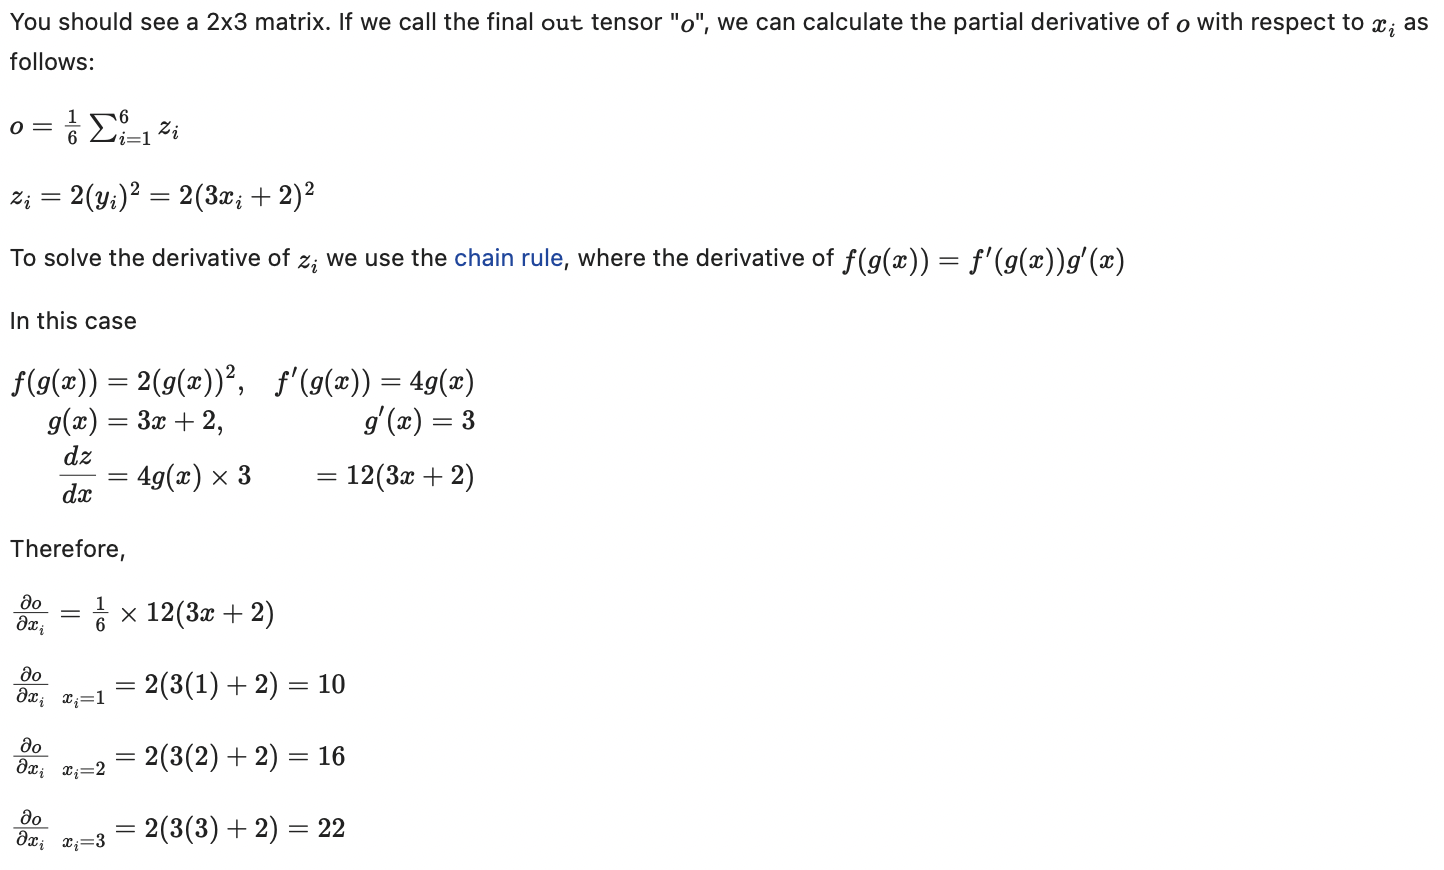

Turn off tracking

There may be times when we don't want or need to track the computational history.

You can reset a tensor's `requires_grad` attribute in-place using .`requires_grad_(True)` (or False) as needed.

When performing evaluations, it's often helpful to wrap a set of operations in with `torch.no_grad()`:

A less-used method is to run `.detach()` on a tensor to prevent future computations from being tracked. This can be handy when cloning a tensor.